In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.interpolate as interp
import xarray as xr
from scipy.interpolate import RectBivariateSpline


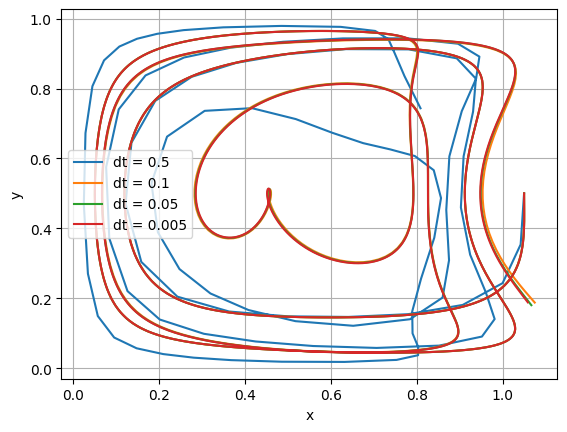

In [2]:
# Heuns method
def heun(x0, y0, t0, tf, f, Nmax=100):
    xs = [x0]
    ys = [y0]
    ts = [t0]
    dt = (tf - t0) / Nmax
    
    while ts[-1] < tf:
        x,y, t = xs[-1],ys[-1],ts[-1]
        k0_x, k0_y = f(x, y, t)
        k1_x, k1_y  = f(x + dt * k0_x, y + dt*k0_y, t + dt)
        
        xs.append(x + 0.5 * dt * (k0_x + k1_x))
        ys.append(y + 0.5 * dt * (k0_y + k1_y))
        ts.append(t + dt)
    return np.array(xs), np.array(ys), np.array(ts)


def func(x, t):
    eps, w = 0.25, 1
    a = eps * np.sin(w * t)
    b = 1 - 2 * eps * np.sin(w * t)
    dy = 2 * a * x + b
    y = a * x**2 + b * x
    return y, dy

def velocity(x, y, t):
    A = 0.1
    f, df = func(x, t)
    vx = -np.pi * A * np.sin(np.pi * f) * np.cos(np.pi * y)
    vy = np.pi * A * np.cos(np.pi * f) * np.sin(np.pi * y) * df
    return vx, vy

ti, tf = 0, 50
x0, y0 = np.array([1.05, 0.50])

for N in [100, 500, 1000, 10000]:
    xs, ys, ts = heun(x0, y0, ti, tf, velocity, N)
    plt.plot(xs, ys, label="dt = {}".format((tf - ti) / N))
    
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()



### 1.a 
- We will first consider a single particle starting from an initial position $x0 = [1.05, 0.5]$. Let the trajectory, $x(t)$, of the particle be controlled by Eqs. (3) and (4). Calculate the trajectory for the time interval $t \in [0, 50]$, using **Heun’s method.**
- Try a few different timesteps, and compare the results by plotting the trajectories for different timesteps in the same plot. Make up your mind about what seems a reasonably short timestep. What happens if you double the integration time, such that $t \in [0, 100]$, is the same timestep still a good choice?

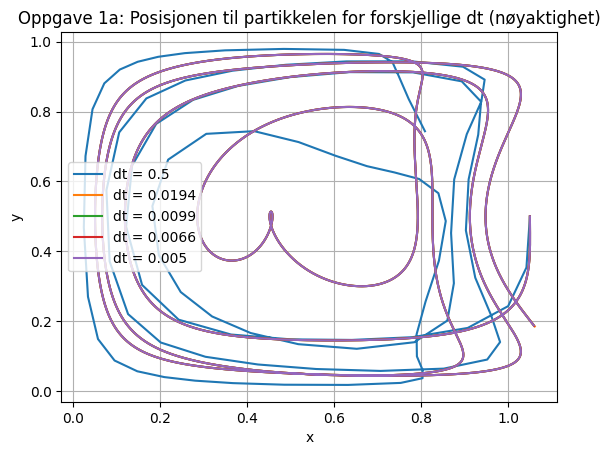

In [3]:
from module.trajectory import Trajectory

# Oppgave 1a
traj = Trajectory()
traj.oppgave_1a()

## oppgave 2

In [4]:
from module.interpolate import Interpolator

In [5]:
dataset  = xr.open_dataset('/Users/ninaaarnes/Library/CloudStorage/OneDrive-NTNU/2_klasse/V2024/Vitenskapelige beregninger/prosjekter/prosjekt3/Particle-transport-with-ocean-currents/NorKyst-800m.nc')
f  = Interpolator(dataset = dataset)

In [6]:
# initial conditions
x = random.gauss(790000, 10000)
y = random.gauss(490000, 10000)
t0 = 0

particle = Trajectory()